# 1) Import libraries

In [11]:
import pandas as pd
import os
import requests
import io
import numpy as np
import datetime
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 2) Import Data
## 2.1) Set Folder Path

In [12]:
PATH = '..\data'
print(os.getcwd())

C:\Users\maxim\OneDrive\Desktop\Unibo\Machine Learning Systems for Data Science_90477\Module II\Final Project\pr7-main\scripts


## 2.2) Import air quality data for New York, Milan and Tokyo from data folder

In [13]:
# 2.2.1) For New York
ny_air_PATH = os.path.join(PATH, 'new-york-air-quality.csv')
ny_air = pd.read_csv(ny_air_PATH, parse_dates = ['date'])
ny_air.rename(columns = {' pm25': 'pm25_ny', ' o3': 'o3_ny', ' no2': 'no2_ny',\
                         ' co': 'co_ny'}, inplace = True)

# Overview
ny_air.info() # We can see that the columns in air need to be converted to 'int64'
ny_air.describe(include = 'all', datetime_is_numeric = True) # 'datetime_is_numeric = True' is used to silence a known Python warning
print(ny_air.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     3207 non-null   datetime64[ns]
 1   pm25_ny  3207 non-null   object        
 2   o3_ny    3207 non-null   object        
 3   no2_ny   3207 non-null   object        
 4   co_ny    3207 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 125.4+ KB
        date pm25_ny o3_ny no2_ny co_ny
0 2022-11-01      40    28     20     3
1 2022-11-02      45    23     25     3
2 2022-11-03      53    17     26     4
3 2022-11-04      47    24     10     1
4 2022-11-05      31    21      6     1


In [14]:
# 2.2.2) For Tokyo
tk_air_PATH = os.path.join(PATH, 'hibiyakoen,-chiyoda, tokyo, japan-air-quality.csv')
tk_air = pd.read_csv(tk_air_PATH, parse_dates = ['date'])
tk_air.rename(columns = {' pm25': 'pm25_tk', ' pm10': 'pm10_tk', ' o3': 'o3_tk',\
                         ' no2': 'no2_tk', ' so2': 'so2_tk', ' co': 'co_tk'}, inplace = True)

# Overview
tk_air.info() # We can see that the columns in air need to be converted to 'int64'
tk_air.describe(include = 'all', datetime_is_numeric = True) # 'datetime_is_numeric = True' is used to silence a known Python warning
print(tk_air.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     3271 non-null   datetime64[ns]
 1   pm25_tk  3271 non-null   object        
 2   pm10_tk  3271 non-null   object        
 3   o3_tk    3271 non-null   object        
 4   no2_tk   3271 non-null   object        
 5   so2_tk   3271 non-null   object        
 6   co_tk    3271 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 179.0+ KB
        date pm25_tk pm10_tk o3_tk no2_tk so2_tk co_tk
0 2022-12-01      25       9    19     15      1     2
1 2022-12-02      29      11           18            4
2 2022-12-03      36      14    15     16      1     4
3 2022-12-04      46       9    17     16      1     2
4 2022-12-05      29       7    14     17            3


In [15]:
# 2.2.3) For Milan
ml_air_PATH = os.path.join(PATH, 'milano-senato, lombardia, italy-air-quality.csv')
ml_air = pd.read_csv(ml_air_PATH, parse_dates = ['date'])
ml_air.rename(columns = {' pm25': 'pm25_ml', ' pm10': 'pm10_ml', ' no2': 'no2_ml',\
                         ' co': 'co_ml'}, inplace = True)

# Overview
ml_air.info() # We can see that the columns in air need to be converted to 'int64'
ml_air.describe(include = 'all', datetime_is_numeric = True) # 'datetime_is_numeric = True' is used to silence a known Python warning
print(ml_air.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860 entries, 0 to 2859
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2860 non-null   datetime64[ns]
 1   pm25_ml  2860 non-null   object        
 2   pm10_ml  2860 non-null   object        
 3   no2_ml   2860 non-null   object        
 4   co_ml    2860 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 111.8+ KB
        date pm25_ml pm10_ml no2_ml co_ml
0 2022-12-01     134      34     27      
1 2022-12-02      82      24     23      
2 2022-12-03      76      13     20      
3 2022-12-04      53      16     22      
4 2022-12-05      50      36     39      


## 2.3) Import New York health data from Github repository

In [16]:
url_ny_health = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/data-by-day.csv'
download_ny_health = requests.get(url_ny_health).content
ny_health = pd.read_csv(io.StringIO(download_ny_health.decode('utf-8')), sep = ',', parse_dates= ['date_of_interest'])
ny_health.rename(columns = {'DEATH_COUNT': 'death_ny'}, inplace = True)

# Overview
ny_health.info()
ny_health.describe(include = 'all', datetime_is_numeric = True) # 'datetime_is_numeric = True' is used to silence a known Python warning
print(ny_health.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 67 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date_of_interest                 1037 non-null   datetime64[ns]
 1   CASE_COUNT                       1037 non-null   int64         
 2   PROBABLE_CASE_COUNT              1037 non-null   int64         
 3   HOSPITALIZED_COUNT               1037 non-null   int64         
 4   death_ny                         1037 non-null   int64         
 5   PROBABLE_DEATH_COUNT             1037 non-null   int64         
 6   CASE_COUNT_7DAY_AVG              1037 non-null   int64         
 7   ALL_CASE_COUNT_7DAY_AVG          1037 non-null   int64         
 8   HOSP_COUNT_7DAY_AVG              1037 non-null   int64         
 9   DEATH_COUNT_7DAY_AVG             1037 non-null   int64         
 10  ALL_DEATH_COUNT_7DAY_AVG         1037 non-null   int64      

## 2.4) Compare the confirmed death count of all districts with the aggregate variable (quality check)

In [17]:
ny_health_death_sum = pd.DataFrame({'death_ny_sum': ny_health.loc[:, ['BX_DEATH_COUNT', 'BK_DEATH_COUNT', 'MN_DEATH_COUNT',\
                                                                   'QN_DEATH_COUNT', 'SI_DEATH_COUNT']].sum(axis = 1)})
ny_health_death_total = ny_health[['date_of_interest', 'death_ny']]
ny_health_death_merged = pd.concat([ny_health_death_total, ny_health_death_sum], axis = 1)

print(ny_health_death_merged['death_ny'].equals(ny_health_death_merged['death_ny_sum']))

# We do not have a perfect match. However, the mismatch is negligible as it does not fall into the period (2020-03-03 
# - 2020-06-26) we are focusing on:
ny_health_death_merged.loc[ny_health_death_merged['death_ny'] != ny_health_death_merged['death_ny_sum']]

False


,date_of_interest,death_ny,death_ny_sum
415,2021-04-19,42,41
653,2021-12-13,21,20


## 2.5) Import Milan health data from Github repository

In [18]:
# (takes around 40sec to run)

# Create a date range for concatenation (below) and initialize the case_count list and the ml_health dictionary
date_range_strings = pd.date_range(start = '20200303', end = '20200626', freq = 'D').strftime('%Y%m%d')
case_count_list = []
ml_health = {'date': [], 'case': []}

# Loop through list of URLs and create a dictionary with key = 'date' and value = 'case'
for i in date_range_strings:
    
    # Create URL by string concatenation
    url_ml_health = ('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-'\
                     + i + '.csv') 
    download_ml_health = requests.get(url_ml_health).content
    
    # Use string splits to single out the row for 'Milano' and the column 'totale_casi'
    case_count = str(download_ml_health).split('Milano')[1].split(',\\n')[0].split(',')[4] 
    
    # Append the dictionary wth the new key-value pair
    ml_health['date'].append(i)
    ml_health['case'].append(case_count)
    
print(ml_health)

# Convert the dictionary into a dataframe
ml_health = pd.DataFrame.from_dict(ml_health)
ml_health.head()

{'date': ['20200303', '20200304', '20200305', '20200306', '20200307', '20200308', '20200309', '20200310', '20200311', '20200312', '20200313', '20200314', '20200315', '20200316', '20200317', '20200318', '20200319', '20200320', '20200321', '20200322', '20200323', '20200324', '20200325', '20200326', '20200327', '20200328', '20200329', '20200330', '20200331', '20200401', '20200402', '20200403', '20200404', '20200405', '20200406', '20200407', '20200408', '20200409', '20200410', '20200411', '20200412', '20200413', '20200414', '20200415', '20200416', '20200417', '20200418', '20200419', '20200420', '20200421', '20200422', '20200423', '20200424', '20200425', '20200426', '20200427', '20200428', '20200429', '20200430', '20200501', '20200502', '20200503', '20200504', '20200505', '20200506', '20200507', '20200508', '20200509', '20200510', '20200511', '20200512', '20200513', '20200514', '20200515', '20200516', '20200517', '20200518', '20200519', '20200520', '20200521', '20200522', '20200523', '20200

,date,case
0,20200303,93
1,20200304,145
2,20200305,197
3,20200306,267
4,20200307,361


# 3) Process and merge data
## 3.1) Process data

In [19]:
# 3.1.1) Convert the date column and sort the data by dates; Print the date range

def convert_sort_date_rows(data, date_column_name):
    
    # Use date_column_name to create a column index number
    date_column_index = data.columns.get_loc(date_column_name)
    
    # Convert datetime column to date-format without loosing the Dtype 'datetime64[ns]'
    data.iloc[:, date_column_index] = pd.to_datetime(data.iloc[:, date_column_index])
    
    # Sort by date_column_name and print the date range
    data = data.sort_values(by = date_column_name)
    date_range_min = min(data.iloc[:, date_column_index].dt.strftime('%Y-%m-%d'))
    date_range_max = max(data.iloc[:, date_column_index].dt.strftime('%Y-%m-%d'))
    print(f'Date range: {date_range_min}, {date_range_max}')
    
    return(data)

In [20]:
# 3.1.2) Apply the convert_sort_date_rows() function to air data
print("New York air quality data:")
ny_air = convert_sort_date_rows(data = ny_air, date_column_name = 'date')
print("Tokyo air quality data:")
tk_air = convert_sort_date_rows(data = tk_air, date_column_name = 'date')
print("Milan air quality data:")
ml_air = convert_sort_date_rows(data = ml_air, date_column_name = 'date')

New York air quality data:
Date range: 2014-01-01, 2022-11-20
Tokyo air quality data:
Date range: 2014-01-02, 2022-12-31
Milan air quality data:
Date range: 2014-10-05, 2022-12-28


In [22]:
# 3.1.3) Apply the convert_sort_date_rows() function to health data
print("New York health data:")
ny_health = convert_sort_date_rows(data = ny_health, date_column_name = 'date_of_interest')
print("Tokyo health data:")
# tk_health = convert_sort_date_rows(data = tk_health, date_column_name = 'date') TO BE ADDED; NEEDS CLARIFICATION
print("Milan health data:")
ml_health = convert_sort_date_rows(data = ml_health, date_column_name = 'date')
# We can see that no date range includes the other. We therefore need an outer merge in 3.2)

New York health data:
Date range: 2020-02-29, 2022-12-31
Tokyo health data:
Milan health data:
Date range: 2020-03-03, 2020-06-26


In [23]:
# 3.1.4) Find missing date rows in both air and health and add the missing rows

def add_missing_date_rows(data, date_column_name):
    
    # Before dropping the date_column_name (see below): Use it to create a column index number and the date range min/max
    date_column_index = data.columns.get_loc(date_column_name)
    date_range_min = min(data.iloc[:, date_column_index].dt.strftime('%Y-%m-%d'))
    date_range_max = max(data.iloc[:, date_column_index].dt.strftime('%Y-%m-%d'))
    data = data.set_index(date_column_name, drop = True) # Set date as index; the original date_column_name is dropped here
    
    # Find missing date rows
    data.index = pd.to_datetime(data.index) # format to date time object
    date_missing_before = pd.date_range(start = str(date_range_min), end = str(date_range_max)).difference(data.index)
    print(str(date_missing_before.size) + " date rows are missing (before fix)")
    print(date_missing_before) 
    
    # Add the missing date rows
    date_range = pd.date_range(str(date_range_min), str(date_range_max)) # creates perfect date range
    data.index = pd.DatetimeIndex(data.index)
    data = data.reindex(date_range)
    date_missing_after = pd.date_range(start = str(date_range_min), end = str(date_range_max)).difference(data.index)
    print(str(date_missing_after.size) + " date rows are missing (after fix)")
    print(date_missing_after)
    
    data.reset_index(inplace = True, drop = False) # needed to undo the index setting above; inplace = True means the 
    # original air dataframe is targeted; drop = False retrieves the original date column.
    data.rename(columns={'index': date_column_name}, inplace = True) # returning to original column name, so this cell can be re-run easier
    
    return(data)


In [24]:
# 3.1.5) Apply the add_missing_date_rows() function to air data
print("New York air quality data:")
ny_air = add_missing_date_rows(data = ny_air, date_column_name = 'date')

New York air quality data:
39 date rows are missing (before fix)
DatetimeIndex(['2014-12-29', '2014-12-30', '2014-12-31', '2016-01-01',
               '2017-01-28', '2017-09-06', '2017-09-07', '2017-09-08',
               '2018-12-31', '2019-10-07', '2019-10-08', '2019-10-09',
               '2019-10-10', '2019-10-11', '2019-10-12', '2019-10-13',
               '2019-10-14', '2019-10-15', '2019-10-16', '2019-10-17',
               '2019-10-18', '2019-10-19', '2019-10-20', '2019-10-21',
               '2019-10-22', '2019-10-23', '2019-10-24', '2019-10-25',
               '2019-10-26', '2019-10-27', '2019-10-28', '2019-10-29',
               '2019-10-30', '2019-10-31', '2019-11-01', '2019-11-02',
               '2019-12-30', '2019-12-31', '2020-03-30'],
              dtype='datetime64[ns]', freq=None)
0 date rows are missing (after fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [25]:
print("Tokyo air quality data:")
tk_air = add_missing_date_rows(data = tk_air, date_column_name = 'date')

Tokyo air quality data:
15 date rows are missing (before fix)
DatetimeIndex(['2014-01-24', '2014-01-25', '2014-12-28', '2014-12-29',
               '2014-12-30', '2015-01-10', '2017-09-07', '2017-09-08',
               '2017-09-09', '2019-12-30', '2020-03-30', '2020-09-08',
               '2020-09-09', '2020-09-10', '2020-09-11'],
              dtype='datetime64[ns]', freq=None)
0 date rows are missing (after fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [26]:
print("Milan air quality data:")
ml_air = add_missing_date_rows(data = ml_air, date_column_name = 'date')

Milan air quality data:
147 date rows are missing (before fix)
DatetimeIndex(['2014-12-29', '2014-12-30', '2015-12-30', '2017-03-10',
               '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
               '2017-09-09', '2017-09-10',
               ...
               '2021-01-02', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-05-03', '2021-05-04', '2021-10-14', '2022-07-19',
               '2022-07-20', '2022-07-31'],
              dtype='datetime64[ns]', length=147, freq=None)
0 date rows are missing (after fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [27]:
# 3.1.6) Apply the add_missing_date_rows() function to health data
print("New York health data:")
ny_health = add_missing_date_rows(data = ny_health, date_column_name = 'date_of_interest')

New York health data:
0 date rows are missing (before fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')
0 date rows are missing (after fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [28]:
print("Tokyo health data:")
# tk_health = add_missing_date_rows(data = tk_health, date_column_name = 'date') TO BE ADDED; NEEDS CLARIFICATION

Tokyo health data:


In [29]:
print("Milan health data:")
ml_health = add_missing_date_rows(data = ml_health, date_column_name = 'date')

Milan health data:
0 date rows are missing (before fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')
0 date rows are missing (after fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


## 3.2) Merge data from air and health into the final dataframe; process the data

In [30]:
# 3.2.1) Outer merge all air data sets by their date columns; change all variables of interest to Dtype 'int64'
air = pd.merge(pd.merge(ny_air, tk_air, how = 'outer', on = 'date'), ml_air, how = 'outer', on = 'date')

In [31]:
# 3.2.2) Outer merge all health data sets by their date columns; change all variables of interest to Dtype 'int64'
# health = pd.merge(pd.merge(ny_health, tk_health, how = 'outer', left_on = 'date_of_interest', right_on = 'date'), ml_health, how = 'outer', on = 'date')

In [32]:
# 3.2.2 - B) TO BE DELETED WHEN 3.2.2) WORKS
health = ny_health

In [96]:
# 3.2.3) Outer merge air and health by their date columns; change all variables of interest to Dtype 'int64'
df_merged = pd.merge(air, health, how = 'outer', left_on = 'date', right_on = 'date_of_interest')
print(df_merged.iloc[0, [0, 5]]) # to check that the merged dataframe starts from the first possible date of both air and health
print(df_merged.iloc[-1, [0, 5]]) # to check that the merged dataframe ends on the last possible date of both air and health
air_date_range_min = min(air.loc[:, 'date'].dt.strftime('%Y-%m-%d'))
air_date_range_max = max(air.loc[:, 'date'].dt.strftime('%Y-%m-%d'))
health_date_range_min = min(health.loc[:, 'date_of_interest'].dt.strftime('%Y-%m-%d'))
health_date_range_max = max(health.loc[:, 'date_of_interest'].dt.strftime('%Y-%m-%d'))
print(f'Date range for air: {air_date_range_min}, {air_date_range_max}')
print(f'Date range for health: {health_date_range_min}, {health_date_range_max}')
# The date range matches.

# 3.2.4) Create date_merged column which combines the entries from both date columns
df_merged['date_merged'] = df_merged['date']
df_merged['date_merged'] = df_merged.date_merged.combine_first(df_merged.date)

# 3.2.5 Create final dataframe - co_ml and co_ny are excluded because they do not show any or too little data in the time frame
set_start_date = '2020-03-03'
set_end_date = '2020-06-26'
index_start_date = df_merged.loc[df_merged.date_merged == set_start_date].index[0]
index_end_date = df_merged.loc[df_merged.date_merged == set_end_date].index[0]
df_final = df_merged.copy()
df_final = df_final.loc[index_start_date:index_end_date, ['date_merged',\
                                                          'pm25_ny', 'o3_ny', 'no2_ny',\
                                                          'pm25_tk', 'pm10_tk', 'o3_tk', 'no2_tk', 'so2_tk', 'co_tk',\
                                                          'pm25_ml', 'pm10_ml', 'no2_ml',\
                                                          'death_ny']]

df_final.head()

date       2014-01-01 00:00:00
pm25_tk                    NaN
Name: 0, dtype: object
date       2022-12-31 00:00:00
pm25_tk                     26
Name: 3286, dtype: object
Date range for air: 2014-01-01, 2022-12-31
Date range for health: 2020-02-29, 2022-12-31


,date_merged,pm25_ny,o3_ny,no2_ny,pm25_tk,pm10_tk,o3_tk,no2_tk,so2_tk,co_tk,pm25_ml,pm10_ml,no2_ml,death_ny
2253,2020-03-03,37,,10,32,14,22,20,1,3,70,27,41,0.0
2254,2020-03-04,20,,12,46,9,33,11,,3,74,25,31,0.0
2255,2020-03-05,20,,19,32,11,34,12,1,2,65,29,33,0.0
2256,2020-03-06,23,,9,37,13,32,16,1,2,74,34,38,0.0
2257,2020-03-07,24,,12,42,14,30,9,,2,91,20,30,0.0


## 3.3) Process final dataframe

In [99]:
# 3.3.1) Rename columns
df_final.rename(columns={'date_merged': 'date'}, inplace = True)
df_final

# 3.3.2) Replace empty values by NaN
df_final = df_final.replace(r'^\s*$', np.nan, regex = True) 

# 3.3.3) Use a linear interpolation to replace NaN values
# Note: o3_ny cannot be interpolated
df_final[['pm25_ny_ip', 'no2_ny_ip',\
          'pm25_tk_ip', 'pm10_tk_ip', 'o3_tk_ip', 'no2_tk_ip', 'so2_tk_ip', 'co_tk_ip',\
          'pm25_ml_ip', 'pm10_ml_ip', 'no2_ml_ip',\
          'death_ny_ip']] = df_final[['pm25_ny', 'no2_ny',\
                                        'pm25_tk', 'pm10_tk', 'o3_tk', 'no2_tk', 'so2_tk', 'co_tk',\
                                        'pm25_ml', 'pm10_ml', 'no2_ml',\
                                        'death_ny']].astype(float).interpolate(method = 'linear').round(0).astype(np.int64)
df_final[['death_ny']] = df_final[['death_ny']].astype(np.int64)

In [100]:
# df_final.describe(include = 'all', datetime_is_numeric = True)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 2253 to 2368
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         116 non-null    datetime64[ns]
 1   pm25_ny      114 non-null    object        
 2   o3_ny        57 non-null     object        
 3   no2_ny       105 non-null    object        
 4   pm25_tk      113 non-null    object        
 5   pm10_tk      113 non-null    object        
 6   o3_tk        114 non-null    object        
 7   no2_tk       114 non-null    object        
 8   so2_tk       99 non-null     object        
 9   co_tk        111 non-null    object        
 10  pm25_ml      112 non-null    object        
 11  pm10_ml      112 non-null    object        
 12  no2_ml       116 non-null    object        
 13  death_ny     116 non-null    int64         
 14  pm25_ny_ip   116 non-null    int64         
 15  no2_ny_ip    116 non-null    int64         
 16  pm25

In [101]:
with pd.option_context('display.max_rows', None):
   print(df_final)

           date pm25_ny o3_ny no2_ny pm25_tk pm10_tk o3_tk no2_tk so2_tk  \
2253 2020-03-03      37   NaN     10      32      14    22     20      1   
2254 2020-03-04      20   NaN     12      46       9    33     11    NaN   
2255 2020-03-05      20   NaN     19      32      11    34     12      1   
2256 2020-03-06      23   NaN      9      37      13    32     16      1   
2257 2020-03-07      24   NaN     12      42      14    30      9    NaN   
2258 2020-03-08      27   NaN     24      44      12    26     16      1   
2259 2020-03-09      47   NaN     21      32      26    20     24      1   
2260 2020-03-10      43   NaN     15      51      20    34     17      1   
2261 2020-03-11      26   NaN     19      32      18    32     16      1   
2262 2020-03-12      39   NaN     13      37      24    34     26      1   
2263 2020-03-13      28   NaN      7      55      16    30     14    NaN   
2264 2020-03-14      28   NaN      7      36      11    32     12      1   
2265 2020-03

In [103]:
# 3.3.4) Create additional log and difference - based on both raw and interpolated data

# 3.3.4.1) For the raw variables (with NAs)
df_final[['ln_pm25_ny', 'ln_o3_ny', 'ln_no2_ny',\
            'ln_pm25_tk', 'ln_pm10_tk', 'ln_o3_tk', 'ln_no2_tk', 'ln_so2_tk', 'ln_co_tk',\
            'ln_pm25_ml', 'ln_pm10_ml', 'ln_no2_ml',\
            'ln_death_ny']] = np.log(df_final[['pm25_ny', 'o3_ny', 'no2_ny',\
                                                'pm25_tk', 'pm10_tk', 'o3_tk', 'no2_tk', 'so2_tk', 'co_tk',\
                                                'pm25_ml', 'pm10_ml', 'no2_ml',\
                                                'death_ny']].astype(float)) # warning: log(0) = -Inf
df_final[['d_pm25_ny', 'd_o3_ny', 'd_no2_ny',\
            'd_pm25_tk', 'd_pm10_tk', 'd_o3_tk', 'd_no2_tk', 'd_so2_tk', 'd_co_tk',\
            'd_pm25_ml', 'd_pm10_ml', 'd_no2_ml',\
            'd_death_ny']] = df_final[['pm25_ny', 'o3_ny', 'no2_ny',\
                                                'pm25_tk', 'pm10_tk', 'o3_tk', 'no2_tk', 'so2_tk', 'co_tk',\
                                                'pm25_ml', 'pm10_ml', 'no2_ml',\
                                                'death_ny']].astype(float).diff(periods = 1, axis = 0)

# 3.3.4.2) For all available interpolated variables; 
# Note: Interpolation not is not available for o3_ny - see 3.3.3)
df_final[['ln_pm25_ny_ip', 'ln_no2_ny_ip',\
            'ln_pm25_tk_ip', 'ln_pm10_tk_ip', 'ln_o3_tk_ip', 'ln_no2_tk_ip', 'ln_so2_tk_ip', 'ln_co_tk_ip',\
            'ln_pm25_ml_ip', 'ln_pm10_ml_ip', 'ln_no2_ml_ip',\
            'ln_death_ny_ip']] = np.log(df_final[['pm25_ny_ip', 'no2_ny_ip',\
                                                'pm25_tk_ip', 'pm10_tk_ip', 'o3_tk_ip', 'no2_tk_ip', 'so2_tk_ip', 'co_tk_ip',\
                                                'pm25_ml_ip', 'pm10_ml_ip', 'no2_ml_ip',\
                                                'death_ny_ip']]) # warning: log(0) = -Inf
df_final[['d_pm25_ny_ip', 'd_no2_ny_ip',\
            'd_pm25_tk_ip', 'd_pm10_tk_ip', 'd_o3_tk_ip', 'd_no2_tk_ip', 'd_so2_tk_ip', 'd_co_tk_ip',\
            'd_pm25_ml_ip', 'd_pm10_ml_ip', 'd_no2_ml_ip',\
            'd_death_ny_ip']] = df_final[['pm25_ny_ip', 'no2_ny_ip',\
                                            'pm25_tk_ip', 'pm10_tk_ip', 'o3_tk_ip', 'no2_tk_ip', 'so2_tk_ip', 'co_tk_ip',\
                                            'pm25_ml_ip', 'pm10_ml_ip', 'no2_ml_ip',\
                                            'death_ny_ip']].diff(periods = 1, axis = 0)

# 3.3.5) Replace Inf and -Inf by NaN
df_final.replace([np.inf, -np.inf], np.nan, inplace = True) # replace Inf and -Inf by NaN

C:\Users\maxim\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

divide by zero encountered in log

C:\Users\maxim\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

divide by zero encountered in log



## 3.4) View the whole final dataframe

In [104]:
with pd.option_context('display.max_rows', None):
   print(df_final)

df_final.head()
df_final.info()

           date pm25_ny o3_ny no2_ny pm25_tk pm10_tk o3_tk no2_tk so2_tk  \
2253 2020-03-03      37   NaN     10      32      14    22     20      1   
2254 2020-03-04      20   NaN     12      46       9    33     11    NaN   
2255 2020-03-05      20   NaN     19      32      11    34     12      1   
2256 2020-03-06      23   NaN      9      37      13    32     16      1   
2257 2020-03-07      24   NaN     12      42      14    30      9    NaN   
2258 2020-03-08      27   NaN     24      44      12    26     16      1   
2259 2020-03-09      47   NaN     21      32      26    20     24      1   
2260 2020-03-10      43   NaN     15      51      20    34     17      1   
2261 2020-03-11      26   NaN     19      32      18    32     16      1   
2262 2020-03-12      39   NaN     13      37      24    34     26      1   
2263 2020-03-13      28   NaN      7      55      16    30     14    NaN   
2264 2020-03-14      28   NaN      7      36      11    32     12      1   
2265 2020-03

# 4) Descriptive plots
## 4.1) Scatterplots


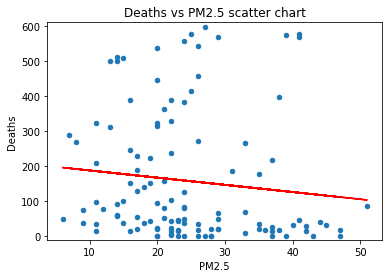

In [14]:
# 4.1.1) Deaths vs PM2.5
df_final.plot.scatter(x = 'pm25',
                     y = 'death',
                     ylim = (-10, 610)
                     )
# Add title and axis names
plt.title('Deaths vs PM2.5 scatter chart')
plt.xlabel('PM2.5')
plt.ylabel('Deaths')

# Create linear regression
X = df_final.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array ->PM2.5
Y = df_final.iloc[:, 3].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column-> Death
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.plot(X, Y_pred, color='red')
plt.show()

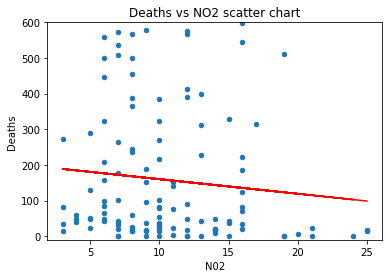

In [15]:
# 4.1.2) Deaths vs NO2
df_final.plot.scatter(x = 'no2',
                     y = 'death',
                     ylim = (-10, 600))
# Add title and axis names
plt.title('Deaths vs NO2 scatter chart')
plt.xlabel('N02')
plt.ylabel('Deaths')

# Create linear regression
X = df_final.iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array -> NO2
Y = df_final.iloc[:, 3].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column-> Death
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.plot(X, Y_pred, color='red')
plt.show()

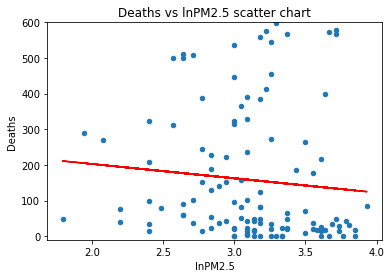

In [16]:
# 4.1.3) Deaths vs lnPM2.5
df_final.plot.scatter(x = 'ln_pm25',
                     y = 'death',
                     ylim = (-10, 600))
# Add title and axis names
plt.title('Deaths vs lnPM2.5 scatter chart')
plt.xlabel('lnPM2.5')
plt.ylabel('Deaths')

# Create linear regression
X = df_final.iloc[:, 4].values.reshape(-1, 1)  # values converts it into a numpy array ->lnPM2.5
Y = df_final.iloc[:, 3].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column-> Death
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.plot(X, Y_pred, color='red')
plt.show()

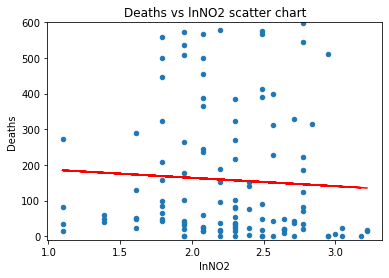

In [17]:
# 4.1.4) Deaths vs lnNO2
df_final.plot.scatter(x = 'ln_no2',
                     y = 'death',
                     ylim = (-10, 600))
# Add title and axis names
plt.title('Deaths vs lnNO2 scatter chart')
plt.xlabel('lnNO2')
plt.ylabel('Deaths')

#Create linear regression
X = df_final.iloc[:, 5].values.reshape(-1, 1)  # values converts it into a numpy array -> lnNO2
Y = df_final.iloc[:, 3].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column-> Death
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.plot(X, Y_pred, color='red')
plt.show()

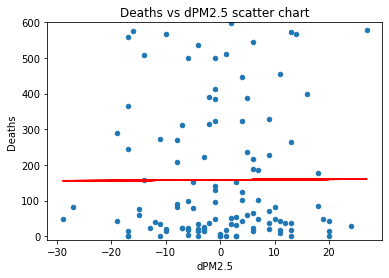

In [18]:
# 4.1.5) Deaths vs dPM2.5
df_final.plot.scatter(x = 'd_pm25',
                     y = 'death',
                     ylim = (-10, 600))
# Add title and axis names
plt.title('Deaths vs dPM2.5 scatter chart')
plt.xlabel('dPM2.5')
plt.ylabel('Deaths')

#Create linear regression
##small comment: DataFrame has NaN values so we have at least 2 solution: 
                    # 1. remove rows with NaN values
                    # 2. replace the NaN values with the mean -> I chose the second one because it seems more reasonable to me
                        ##if you have other suggestions tell me
            
X_new=df_final.iloc[:, 7].fillna(df_final.iloc[:, 7].mean()) #replace the NaN values with the mean 
X = X_new.values.reshape(-1, 1)  # values converts it into a numpy array -> dPM2.5
Y = df_final.iloc[:, 3].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column-> Death
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.plot(X, Y_pred, color='red')
plt.show()

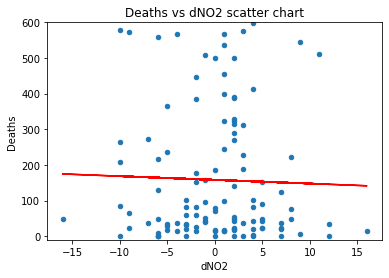

In [19]:
# 4.1.6) Deaths vs dNO2
df_final.plot.scatter(x = 'd_no2',
                     y = 'death',
                     ylim = (-10, 600)
                     )
# Add title and axis names
plt.title('Deaths vs dNO2 scatter chart')
plt.xlabel('dNO2')
plt.ylabel('Deaths')

#Create linear regression
X_new=df_final.iloc[:, 8].fillna(df_final.iloc[:, 8].mean()) #replace the NaN values with the mean
X = X_new.values.reshape(-1, 1)  # values converts it into a numpy array -> dNO2
Y = df_final.iloc[:, 3].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column-> Death
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.plot(X, Y_pred, color='red')
plt.show()

## 4.2) Plotting by date

In [20]:
# 4.2.1) Timeline of confirmed deaths
fig = px.line(df_final, x = 'date', y = 'death')

fig.update_layout(title = 'Timeline of confirmed deaths', 
                  xaxis_title = 'Date', yaxis_title = 'Confirmed deaths',  
                  legend = dict(yanchor = "top", y = 0.99, xanchor = "right", x = 0.99))

fig.update_traces(line_color='darkcyan', line_width = 3)

fig.add_trace(go.Scatter(x = df_final['date'], y = [200]*len(df_final), 
                          mode = 'lines', name = '200 count line', 
                          line = dict(dash = 'dash', color = 'gray')))

fig.add_trace(go.Scatter(x = df_final['date'], y = [400]*len(df_final), 
                          mode = 'lines', name = '400 count line', 
                          line = dict(dash = 'dash', color = 'maroon')))

fig.add_trace(go.Scatter(x=df_final['date'], y = [600]*len(df_final), 
                          mode = 'lines', name = '600 count line', 
                          line = dict(dash = 'dash', color = 'black')))

In [21]:
# 4.2.2) Timeline of PM2.5 and NO2 concentration levels
fig = px.line(df_final, x = 'date', y = 'pm25')

fig.add_trace(go.Scatter(x = df_final.date, y = df_final.pm25, 
                        mode = 'lines', name = 'PM2.5', line_color = 'darkorange', line_width = 2))

fig.add_trace(go.Scatter(x = df_final.date, y = df_final.no2, 
                        mode = 'lines', name = 'NO2', line_color = 'mediumblue', line_width = 2))

fig.update_layout(title = 'Timeline of PM2.5 and NO2 concentration levels', 
                  xaxis_title = 'Date', yaxis_title = '$\\mu g / m^{3}$', 
                  legend = dict(yanchor = "top", y = 0.99, xanchor = "right", x = 0.99))

In [22]:
# 4.2.3) Timeline of confirmed deaths and PM2.5 concentration levels
fig = px.bar(df_final.sort_values('death', ascending = False), 
       x = "date", y = "death", color = 'pm25', 
       title = 'Timeline of confirmed deaths and PM2.5 concentration levels',
       color_discrete_sequence = px.colors.qualitative.Vivid)

fig.update_traces(textposition = 'outside')
fig.update_layout(uniformtext_minsize = 8, uniformtext_mode = 'hide', xaxis_title = 'Date', yaxis_title = 'Confirmed deaths')
fig.show()

In [23]:
# 4.2.4) Timeline of confirmed deaths and NO2 concentration levels
fig = px.bar(df_final.sort_values('death', ascending = False), 
       x = "date", y = "death", color = 'no2', 
       title = 'Deaths and NO2 concentration levels over time',
       color_discrete_sequence = px.colors.qualitative.Vivid)

fig.update_traces(textposition = 'outside')
fig.update_layout(uniformtext_minsize = 8, uniformtext_mode = 'hide', xaxis_title = 'Date', yaxis_title = 'Confirmed deaths')
fig.show()

# 5) Prediction with Artificial Neural Networks (ANNs)
## 5.1) Something with Apache Spark -> Oryx 2.8.0

In [51]:
pip install spylon-kernel

Note: you may need to restart the kernel to use updated packages.


In [4]:
# run this ins anaconda powershell prompt, to install scala
python -m spylon_kernel install

SyntaxError: invalid syntax (4040037691.py, line 1)

In [5]:
# open jupyter with scala and run this code
sudo apt install default-jdk scala git -y

SyntaxError: invalid syntax (886566313.py, line 1)

In [11]:
with pd.option_context('display.max_rows', None):
   print(health)

     date_of_interest  CASE_COUNT  PROBABLE_CASE_COUNT  HOSPITALIZED_COUNT  \
0          2020-02-29           1                    0                   1   
1          2020-03-01           0                    0                   1   
2          2020-03-02           0                    0                   2   
3          2020-03-03           1                    0                   7   
4          2020-03-04           5                    0                   2   
5          2020-03-05           3                    0                  14   
6          2020-03-06           8                    0                   8   
7          2020-03-07           7                    0                   8   
8          2020-03-08          21                    0                  18   
9          2020-03-09          57                    0                  36   
10         2020-03-10          69                    0                  60   
11         2020-03-11         155                    0          